# Swiss Communes – Demographic and Spatial Data Analysis

**Author:** Mame Faty Lo  
**Context:** Applied Data Science: Machine Learning (EPFL Extension School)

---

## Academic Integrity Declaration

Academic Integrity and Learning Statement

By submitting my work, I confirm that:

1. The code, analysis, and documentation in this notebook are my own work and reflect my own understanding.
2. I am prepared to explain all code and analysis included in this submission.

If I used assistance (e.g., AI tools, tutors, or other resources), I have:

- Clearly documented where and how external tools or resources were used in my solution.
- Included a copy of the interaction (e.g., AI conversation or tutoring notes) in an appendix.

I acknowledge that:

- I may be asked to explain any part of my code or analysis during evaluation.
- Misrepresenting assisted work as my own constitutes academic dishonesty and undermines my learning.

## A. Overview of the Dataset

The dataset `p1_communes.csv`, sourced from the Swiss Federal Statistical Office (FSO), is reviewed to assess its structure and data integrity prior to exploration.

The inspection includes:

- **Data Ingestion and Volumetric Audit:** Load the dataset, verify the number of rows and columns, and preview the first entries.
- **Schema & Metadata Validation:** Examine the index structure, column names, and data types.
- **Data Completeness Audit:** Identify and address missing or inconsistent values.

> Establishing structural clarity and data integrity is a prerequisite for reliable statistical and exploratory analysis.

### Data Ingestion and Volumetric Audit (A1-A3)

We utilized pd.read_csv() to establish the primary data frame. I chose to use a variable for the filename to ensure the script is modular and easily updated if the source file version changes—a standard practice for automated operational tools. The use of .head() and .shape serves as an initial Dimensional Audit to confirm successful loading and column alignment.

In [2]:
import pandas as pd
import numpy as np

# A1. Load dataset
dataset_name = 'p1_communes.csv'
df = pd.read_csv(dataset_name)

# A2. Report the number of rows and columns
print(f'Loaded dataset: {dataset_name} | {df.shape[0]:,} rows x {df.shape[1]} columns')

# A3. Preview the first entries
display(df.head())

Loaded dataset: p1_communes.csv | 2,202 rows x 17 columns


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


**Initial Observations**

The dataset can be structured into four key thematic groups:

**1. Administrative and Governance**  
`Canton`, `Commune` — define the political and administrative context of each Swiss commune and enable regional comparisons.

**2. Sociodemographic**  
`Residents`, `Population density per km²`, age groups (`0–19`, `20–64`, `65+`), `Language` — describe population structure and characteristics.

**3. Spatial and Geographic**  
`Surface area (km²)`, `Elevation`, coordinates (`East`, `North`) — capture the physical context (size, topography, and location) of each commune.

**4. Land Use**  
`Settlement`, `Agricultural`, `Wooded`, `Unproductive` — represent how land is allocated.

### Schema & Metadata Validation (A4-A5)

This step inspects the dataset schema and organizes columns by data type. It ensures that subsequent preprocessing, plotting, and statistical analyses can be applied appropriately to each variable type.

In [7]:
# A4. Obtain the index labels and show column names as a list
index_labels = df.index
column_names = df.columns.tolist()
print(f"Index labels: {index_labels}\n\nColumn names: {column_names}\n")

# A5. Examine the data types of each column
display(df.dtypes)

Index labels: RangeIndex(start=0, stop=2202, step=1)

Column names: ['Canton', 'Commune', 'Language', 'Residents', 'Population density per km²', '0-19 years', '20-64 years', '65 years or over', 'Private households', 'Surface area in km²', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area', 'East coordinate', 'North coordinate', 'Elevation']



Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

All columns are stored properly and the data types are consistent with their logical representations (e.g., integers for counts and floats for measurements).

Columns are programmatically grouped into **Quantitative** and **Categorical** types to ensure mathematical transformations only target numerical fields, while grouping logic is reserved for categorical identifiers.

In [14]:
# Organize columns by data type for efficient referencing in subsequent tasks
quant_cont = df.select_dtypes(include='float64').columns.tolist()
quant_disc = df.select_dtypes(include='int64').columns.tolist()
cat_nom    = df.select_dtypes(include='object').columns.tolist()

# Create a structural summary for clear data type mapping
column_summary = pd.DataFrame({
    'Quantitative (Continuous)': pd.Series(quant_cont),
    'Quantitative (Discrete)': pd.Series(quant_disc),
    'Categorical (Nominal)': pd.Series(cat_nom)
}).fillna('')

display(column_summary)

,Quantitative (Continuous),Quantitative (Discrete),Categorical (Nominal)
0,Population density per km²,Residents,Canton
1,0-19 years,Private households,Commune
2,20-64 years,East coordinate,Language
3,65 years or over,North coordinate,
4,Surface area in km²,Elevation,
5,Settlement area,,
6,Agricultural area,,
7,Wooded area,,
8,Unproductive area,,


### Data Completeness (A6-A7)

#### Missing Values (A6)

Missing values were identified and inspected to determine the necessary remediation: imputation or removal.

To isolate these records, the dataset was filtered using Boolean indexing: `isna()` was used to map missing entries, while `any(axis=1)` identified any row containing at least one data gap. The resulting records are stored in `missing_rows`.

In [11]:
# A6. Identify and isolate rows with missing values
missing_rows = df[df.isna().any(axis=1)]

# Print the count of rows with missing values
print(f'Number of rows with missing values: {len(missing_rows)}')

display(missing_rows)

Number of rows with missing values: 11


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


#### Gap Analysis (A7)

To determine whether to impute or drop rows, the extent of their 'missingness' must be quantified across the dataset to assess its impact on data quality and ensure all subsequent aggregations are built on a verified and complete dataset.

To do so, the `.mean()` method is applied to the Boolean DataFrame generated by `.isna()`. Since Pandas treats `True` as `1` and `False` as `0`, taking the mean along each column (`axis=0`) directly calculates the proportion of missing values per feature.

In [12]:
# A7. Evaluate missing data proportions
df.isna().mean(axis=0)

Canton                        0.001362
Commune                       0.000000
Language                      0.004995
Residents                     0.000000
Population density per km²    0.000000
0-19 years                    0.000000
20-64 years                   0.000000
65 years or over              0.000000
Private households            0.000000
Surface area in km²           0.000000
Settlement area               0.000000
Agricultural area             0.000000
Wooded area                   0.000000
Unproductive area             0.000000
East coordinate               0.000000
North coordinate              0.000000
Elevation                     0.000000
dtype: float64

> **`Canton`** and **`Language`** are the primary columns containing very few missing values (approximately **0.14%** and **0.50%** respectively). 

As these are categorical nominal variables that can be easily verified through external sources, removing the affected rows is unnecessary. Accurate imputation ensures the dataset remains complete and maintains its structural consistency.

#### Imputation

The following procedure is used:

1. **Standardisation**: 

Before imputation, existing entries are inspected to ensure that all substituted values adhere to the dataset’s specific formatting and case sensitivity. By isolating and sorting unique() values, a reference baseline is established for both `Canton` and `Language`.

In [10]:
# Display unique values sorted alphabetically for easier inspection
print(f"Unique Cantons: {sorted(df['Canton'].dropna().unique())}")
print(f"Unique Languages: {sorted(df['Language'].dropna().unique())}")

Unique Cantons: ['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG', 'ZH']
Unique Languages: ['de', 'fr', 'it', 'rm']


2. **External Cross-Referencing**:

Missing attributes are resolved by leveraging the `Commune` column as a relational key for external research on Google. This process centralizes the findings into a per-commune relational mapping, where each commune serves as a unique primary key associated with its respective `Canton` and `Language` attributes.

In [11]:
# Structure all researched data into a dictionary
imputation_lookup = {
    'Stammheim': {'Language': 'de'},
    'Wädenswil': {'Language': 'de'},
    'Elgg':      {'Language': 'de'},
    'Horgen':    {'Language': 'de'},
    'Thurnen':   {'Canton': 'BE', 'Language': 'de'},
    'Villaz':    {'Canton': 'FR', 'Language': 'fr'},
    'Prez':      {'Canton': 'FR', 'Language': 'fr'},
    'Bergün Filisur': {'Language': 'de'},
    'Rheinwald': {'Language': 'de'},
    'Riviera':   {'Language': 'it'},
    'La Grande Béroche': {'Language': 'fr'}
}

3. **Manual Imputation via Vectorised Assignment**: 

Missing values are resolved using vectorised label-based indexing to ensure a performant and robust data-enrichment workflow. By iterating through a structured `imputation_lookup` dictionary and passing target columns and values as lists to the `.loc` indexer, the script performs simultaneous multi-column updates for each identified commune.

In [12]:
# Map the dictionary values to the missing entries
for commune, updates in imputation_lookup.items():
    df.loc[df['Commune'] == commune, list(updates.keys())] = list(updates.values())

This strategy prioritises referential integrity by anchoring updates to the `Commune` primary key rather than positional indices. By decoupling imputation from row order, the logic remains robust against sorting or filtering during exploration. This ensures a stable, verified foundation for subsequent modeling, leveraging Pandas' data alignment to meet the rigorous standards of reproducible research and operational auditability.

4. **Verification**: The dataset’s completeness is confirmed by chaining `isna()` with a double `sum()` aggregation. The first summation identifies null counts per column, while the second consolidates these into a single global total.

In [13]:
total_missing = df.isna().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

Total missing values in dataset: 0


In [14]:
# Final verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2202 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2202 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

>The dataset is now clean, consistent, and ready for further analysis.

# B. Exploration: Numerical Summaries, Indexing and Grouping

Following the initial data audit, this section applies targeted aggregation to define the dataset's numerical profiles and regional structures.

**Key Deliverables:**
* **Statistical Benchmarking:** Calculating central tendencies (mean, min, max) for all metrics.
* **Demographic Ranking:** Identifying the most and least populated regional hubs.
* **Cantonal Segmentation:** Evaluating population density and elevation ranges to quantify regional disparities.

## B1. Numerical Summaries

A statistical baseline is established by aggregating the  **mean**, **minimum**, and **maximum** values for all previously identified numerical features in **A5**.

In [17]:
# Concatenate continuous and discrete column lists
num_cols = quant_cont + quant_disc

# Aggregate statistics and transpose for vertical readability
num_summary = df[num_cols].agg(['mean', 'min', 'max']).T

# Display summary rounded to three decimal places
display(num_summary.round(3))

,mean,min,max
Population density per km²,432.445,0.895,12669.052
0-19 years,20.586,0.000,37.778
20-64 years,60.366,18.182,77.922
65 years or over,19.048,6.271,81.818
Surface area in km²,18.159,0.310,438.630
Settlement area,14.855,0.139,97.260
Agricultural area,45.940,0.000,91.509
Wooded area,32.565,0.000,88.235
Unproductive area,6.640,0.000,95.023
Residents,3880.348,11.000,415367.000


### Verification of Zero-Value Extremes

The numerical summaries identify several `0.000` minimums across specific demographic and land-use columns. To distinguish **potential data errors** from **physical absences**, these entries are cross-validated against relational benchmarks.

#### Demographics (`0-19 years = 0`)

To validate this demographic void, we employ the following framework:

*   **Distribution Analysis:** We evaluate the remaining **`20-64`** and **`65 years or over`** age groups to determine the full demographic profile of communes reporting 0% youth. This gives a sense of the age imbalance.
*   **Correlative Metric Cross-Reference:** To provide context, we evaluate **`Residents`**, **`Surface Area`**, **`Population Density`**, and **`Elevation`**. This identifies if the demographic void aligns with a specific geographical or topographical footprint.
*   **Benchmarking Against Extremes:** We contrast "Zero-Youth" entries against the dataset's absolute **MIN Residents**, **MIN Area**, and **MIN Density**, alongside **MAX Elevation**. This confirms if the outliers share the same physical constraints as the most extreme regions in Switzerland.
*   **Mathematical Reconciliation:** A final "Sum-to-100%" check ensures the three age cohorts aggregate correctly, confirming the internal statistical integrity of each record.

In [10]:
# Targets for Demographic Validation
youth_targets = [
    (df[df['0-19 years'] == 0], "ZERO YOUTH"),
    (df.nsmallest(1, 'Residents'), "MIN RESIDENTS"),
    (df.nsmallest(1, 'Surface area in km²'), "MIN AREA"),
    (df.nsmallest(1, 'Population density per km²'), "MIN DENSITY"),
    (df.nlargest(1, 'Elevation'), "MAX ELEVATION")
]

# Build comparison report
youth_quality_report = pd.concat([res.assign(Benchmark=label) for res, label in youth_targets])[[
    'Benchmark', 'Commune', 'Canton', 
    '0-19 years', '20-64 years', '65 years or over', 
    'Residents', 'Surface area in km²', 'Population density per km²', 'Elevation'
]]

# Cross-validate that the 3 age groups sum to 100%
youth_quality_report['Total Age %'] = youth_quality_report[['0-19 years', '20-64 years', '65 years or over']].sum(axis=1)

display(youth_quality_report)

,Benchmark,Commune,Canton,0-19 years,20-64 years,65 years or over,Residents,Surface area in km²,Population density per km²,Elevation,Total Age %
1546,ZERO YOUTH,Corippo,TI,0.000000,18.181818,81.818182,11,7.71,1.426719,1134,100.0
1546,MIN RESIDENTS,Corippo,TI,0.000000,18.181818,81.818182,11,7.71,1.426719,1134,100.0
1760,MIN AREA,Rivaz,VD,19.832402,60.055866,20.111732,358,0.31,1154.838710,435,100.0
1953,MIN DENSITY,Zwischbergen,VS,5.194805,77.922078,16.883117,77,86.03,0.895037,2129,100.0
1969,MAX ELEVATION,Fieschertal,VS,20.125786,61.320755,18.553459,318,172.86,1.840171,3080,100.0


Neither extreme population sparsity nor small physical size is sufficient to cause a demographic void. Instead, the absence of youth in **Corippo** is a direct consequence of its **critically low population count** and its **extreme demographic skew**. 

The table confirms this through three key observations:

*   **Dual Record Holder:** **Corippo** holds the national record for both `ZERO YOUTH` and `MIN RESIDENTS`. With only 11 residents, the sample size is statistically too small to guarantee representation in every age bracket.
*   **Demographic Profile:** The data reveals that Corippo’s population is overwhelmingly concentrated in the senior demographic, with **81.8%** of residents in the `65 years or over` category. This is the highest proportion in the sample, indicating a community of retirees.
*   **Geographic & Scale Comparison:** While **Zwischbergen (VS)** is more sparsely populated and **Fieschertal (VS)** sits at a much higher **MAX ELEVATION** (3080m), both maintain a youth population. Even **Rivaz (VD)**, despite being the smallest commune in the country (**MIN AREA**), sustains a standard youth demographic of ~20%. 

> This proves that as long as the resident count is sufficient (above a "critical mass"), a youth demographic typically exists regardless of altitude, density, or surface area.

**Validation:** The `Total Age %` column hits exactly **100.0%**, confirming that the 0.0% youth value is a legitimate, verified observation within a complete dataset.

#### Land Use

Communes reporting **0%** for **`Agricultural area`**, **`Wooded area`**, or **`Unproductive area`** are audited against their total **`Surface Area`**. A **`Total Land Allocation (%)`** metric is computed to verify that the sum of all categories equals **100%**. Cross-referencing this with **`Population Density`** confirms whether these zeros reflect specific geographical constraints or urbanisation levels rather than missing data.

##### `Agricultural area = 0`

To verify the integrity of the data where **`Agricultural area` is 0.0%**, we apply a logic of **spatial prioritisation**. 

*   **Surface Area** acts as the **Scale Constraint**: In micro-communes, limited land forces a trade-off between infrastructure and farming.
*   **Population Density** acts as the **Urban Driver**: It validates whether the absence of farmland is caused by the physical displacement of crops by residents and buildings.

By benchmarking these zeros against national records, we distinguish between **Urban Saturation** (infrastructure-heavy) and **Topographical Exclusion** (nature-heavy).

In [11]:
# Targeted audit
agri_targets = [
    (df[df['Agricultural area'] == 0], "ZERO AGRI"),
    (df.nlargest(1, 'Population density per km²'), "MAX DENSITY"),
    (df.nlargest(1, 'Settlement area'), "MAX SETTLEMENT"),
    (df.nsmallest(1, 'Population density per km²'), "MIN DENSITY"),
    (df.nsmallest(1, 'Settlement area'), "MIN SETTLEMENT"),
    (df.nlargest(1, 'Elevation'), "MAX ELEVATION"),
    (df.nsmallest(1, 'Surface area in km²'), "MIN AREA")
]

# Build the comparison report
agri_quality_report = pd.concat([res.assign(Benchmark=label) for res, label in agri_targets])[[
    'Benchmark', 'Commune', 'Canton', 
    'Agricultural area', 'Settlement area', 'Wooded area', 'Unproductive area',
    'Surface area in km²', 'Population density per km²', 'Elevation'
]]

# Validation (sum to 100%)
agri_quality_report['Total Land %'] = agri_quality_report[
    ['Agricultural area', 'Settlement area', 'Wooded area', 'Unproductive area']
].sum(axis=1)

display(agri_quality_report.round(2))

,Benchmark,Commune,Canton,Agricultural area,Settlement area,Wooded area,Unproductive area,Surface area in km²,Population density per km²,Elevation,Total Land %
388,ZERO AGRI,Nidau,BE,0.00,84.31,3.92,11.76,1.52,4488.82,432,100.0
918,ZERO AGRI,Birsfelden,BL,0.00,79.46,1.55,18.99,2.52,4104.78,258,100.0
1569,ZERO AGRI,Bissone,TI,0.00,20.43,78.49,1.08,1.86,499.46,446,100.0
1586,ZERO AGRI,Massagno,TI,0.00,97.26,2.74,0.00,0.74,8413.51,374,100.0
2124,MAX DENSITY,Genève,GE,1.51,92.13,3.15,3.21,15.92,12669.05,402,100.0
1586,MAX SETTLEMENT,Massagno,TI,0.00,97.26,2.74,0.00,0.74,8413.51,374,100.0
1953,MIN DENSITY,Zwischbergen,VS,11.25,0.37,28.72,59.66,86.03,0.90,2129,100.0
1969,MIN SETTLEMENT,Fieschertal,VS,2.37,0.14,2.47,95.02,172.86,1.84,3080,100.0
1969,MAX ELEVATION,Fieschertal,VS,2.37,0.14,2.47,95.02,172.86,1.84,3080,100.0
1760,MIN AREA,Rivaz,VD,72.41,27.59,0.00,0.00,0.31,1154.84,435,100.0


### Conclusion: Land-Use Reality Check (Spatial Prioritisation)

The **Total Land %** column consistently returns **100.0%** across these communes, confirming that the [Swiss Federal Statistical Office (FSO)](https://www.bfs.admin.ch) dataset is internally consistent and these zeros are legitimate results of land allocation.

*   **Urban Saturation:** In communes like **Massagno (TI)**, **Nidau (BE)**, and **Birsfelden (BL)**, the **Settlement area** is the dominant feature (ranging from 79.5% to 97.3%), leaving no room for agriculture. However, **Genève (MAX DENSITY)** proves that even at the highest density in the country (12,669/km²), a non-zero agricultural share (1.5%) is maintained. This suggests that while urban saturation typically suppresses agriculture, it does not mathematically mandate its total absence.
*   **Environmental Displacement:** **Bissone (TI)** demonstrates that agriculture can be 0.0% even when settlement is low (20.4%). Here, the data shows the land is almost entirely absorbed by **Wooded area (78.5%)**. Comparing this to **Fieschertal (MAX ELEVATION)**, where **95%** of the land is **Unproductive**, we see that different environmental dominants—whether forests or rocky terrain—can both push agricultural activity to near-zero.
*   **Suitability over Scale:** **Rivaz (VD)** provides the most significant benchmark. Despite being the **MIN AREA** (0.31 km²), it maintains a high agricultural share of **72.4%**. This proves that **physical size does not dictate land use**; if a small territory is topographically prioritised for farming, it will sustain that use despite its limited scale.


,Context,Commune,Canton,0-19 years,20-64 years,65 years or over,Surface area in km²,Population density per km²,Residents,Allocation %
1546,ZERO 0-19 YEARS,Corippo,TI,0.000000,18.181818,81.818182,7.71,1.426719,11,100.0
1546,MIN RESIDENTS,Corippo,TI,0.000000,18.181818,81.818182,7.71,1.426719,11,100.0
1760,MIN AREA,Rivaz,VD,19.832402,60.055866,20.111732,0.31,1154.838710,358,100.0


,Context,Commune,Canton,Agricultural area,Settlement area,Wooded area,Unproductive area,Surface area in km²,Population density per km²,Allocation %
2124,MAX DENSITY,Genève,GE,1.510384,92.133417,3.146633,3.209566,15.92,12669.052100,100.0
1586,ZERO AGRICULTURAL AREA,Massagno,TI,0.000000,97.260274,2.739726,0.000000,0.74,8413.513514,100.0
388,ZERO AGRICULTURAL AREA,Nidau,BE,0.000000,84.313725,3.921569,11.764706,1.52,4488.815789,100.0
918,ZERO AGRICULTURAL AREA,Birsfelden,BL,0.000000,79.457364,1.550388,18.992248,2.52,4104.780876,100.0
1760,MIN AREA,Rivaz,VD,72.413793,27.586207,0.000000,0.000000,0.31,1154.838710,100.0
1569,ZERO AGRICULTURAL AREA,Bissone,TI,0.000000,20.430108,78.494624,1.075269,1.86,499.459459,100.0


In [12]:
# B1. Targeted Audit: Wooded Area Integrity & Ecological Thresholds
# Benchmarking Wooded Zeros against urban, agricultural, and alpine extremes
wooded_targets = [
    (df[df['Wooded area'] == 0], "ZERO WOODED"),
    (df.nlargest(1, 'Settlement area'), "MAX SETTLEMENT"),
    (df.nlargest(1, 'Agricultural area'), "MAX AGRI"),
    (df.nlargest(1, 'Elevation'), "MAX ELEVATION"),
    (df.nsmallest(1, 'Surface area in km²'), "MIN AREA")
]

# Build the Comparison Report
wooded_quality_report = pd.concat([res.assign(Benchmark=label) for res, label in wooded_targets])[[
    'Benchmark', 'Commune', 'Canton', 
    'Wooded area', 'Settlement area', 'Agricultural area', 'Unproductive area',
    'Surface area in km²', 'Elevation'
]]

# Audit Step: Critical Land Reconciliation
# Validates that the four categories represent 100.0% of the Surface Area
wooded_quality_report['Total Land %'] = wooded_quality_report[
    ['Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area']
].sum(axis=1)

print("### Wooded Area Integrity & Ecological Audit")
display(wooded_quality_report.round(2))

### Wooded Area Integrity & Ecological Audit


,Benchmark,Commune,Canton,Wooded area,Settlement area,Agricultural area,Unproductive area,Surface area in km²,Elevation,Total Land %
768,ZERO WOODED,Meyriez,FR,0.00,91.18,2.94,5.88,0.34,444,100.0
1760,ZERO WOODED,Rivaz,VD,0.00,27.59,72.41,0.00,0.31,435,100.0
1909,ZERO WOODED,Corseaux,VD,0.00,77.57,21.50,0.93,1.07,420,100.0
1586,MAX SETTLEMENT,Massagno,TI,2.74,97.26,0.00,0.00,0.74,374,100.0
1806,MAX AGRI,Rossenges,VD,3.77,4.72,91.51,0.00,1.08,685,100.0
1969,MAX ELEVATION,Fieschertal,VS,2.47,0.14,2.37,95.02,172.86,3080,100.0
1760,MIN AREA,Rivaz,VD,0.00,27.59,72.41,0.00,0.31,435,100.0


In [19]:
unproductive_zeros = df[df['Unproductive area'] == 0].copy()
unproductive_zeros['Total Land Allocation %'] = unproductive_zeros[land_use_cols].sum(axis=1)

unproductive_zeros = unproductive_zeros[[
    'Commune', 'Canton', 'Unproductive area', 'Surface area in km²', 
    'Population density per km²', 'Total Land Allocation %'
]].sort_values(by='Surface area in km²', ascending=False)

display(unproductive_zeros.head(10))

,Commune,Canton,Unproductive area,Surface area in km²,Population density per km²,Total Land Allocation %
700,Ursy,FR,0.0,14.93,214.199598,100.0
439,Wald (BE),BE,0.0,13.30,88.496241,100.0
1653,Apples,VD,0.0,12.88,113.975155,100.0
2095,Lignières,NE,0.0,12.52,77.316294,100.0
1725,Montilliez,VD,0.0,11.86,150.084317,100.0
1876,Jorat-Mézières,VD,0.0,11.08,259.296029,100.0
333,Oberthal,BE,0.0,10.54,68.975332,100.0
17,Buch am Irchel,ZH,0.0,10.21,95.690500,100.0
48,Nürensdorf,ZH,0.0,10.04,560.657370,100.0
1750,Le Mont-sur-Lausanne,VD,0.0,9.80,869.693878,100.0




- **Wooded area:** Three communes (**Meyriez, Rivaz, Corseaux**) have `0.0%` wooded land. This zero reflects that no forests or tree-covered areas exist, though land may still be used for settlements, agriculture, or be unproductive.  

- **Unproductive area:** 280 communes have `0.0%` unproductive land. This means there is no land considered unusable.  

> **Conclusions:**  
> Zeros in demographic or land-use categories are **valid and meaningful**, not missing data. For example:  
> - A `0.0%` value for the 0–19 age group (e.g., Corippo) means only adults (20+) live there.  
> - `0.0%` agricultural, wooded, or unproductive areas indicate that this land type is absent in the commune, though other categories may still be present.  
> These zeros reflect real characteristics of the communes, so **no data rows were removed or modified**.

The dataset reveals that land use is a zero-sum game of **spatial prioritisation**. A 0.0% value in any category is not an indicator of missing data, but a result of one land type outcompeting others


## B2. Top 10 most populated communes

We rank communes by the number of residents in descending order to identify the largest populations. We also decided to show their respective cantons for a more rounded analysis.

In [20]:
top_10_most_pop = df.sort_values(by='Residents', ascending=False)[['Commune', 'Canton','Residents']].head(10)
display(top_10_most_pop)

,Commune,Canton,Residents
154,Zürich,ZH,415367
2124,Genève,GE,201818
910,Basel,BS,172258
1749,Lausanne,VD,139111
194,Bern,BE,133883
141,Winterthur,ZH,111851
535,Luzern,LU,81691
1053,St. Gallen,SG,75833
1582,Lugano,TI,63185
207,Biel/Bienne,BE,55159


`df.sort_values(by='Residents', ascending=False)`sorts the entire DataFrame `df` in descending order based on the values in the `'Residents'` column. This ensures the rows with the largest numbers of residents appear first.

After sorting,`[...]` narrows the result to just the data needed for ranking here i.e. `['Commune', 'Residents']`. We also added the `Canton` column for canton-level analysis.

The `.head(10)` method shows the first 10 rows from the sorted DataFrame. Since the DataFrame was sorted in descending order by population, these correspond to the 10 most populated communes.

> **Zurich (ZH)** is the most populated commune in Switzerland, followed by **Geneva (GE)**, **Basel (BS)**, **Lausanne (VD)**, and **Bern (BE)**.

## B3. Top 10 Least Populated Communes
Similarly, we rank communes in ascending order by the number of residents to identify the smallest populations.

In [21]:
top_10_least_pop = df.sort_values(by='Residents')[['Commune', 'Canton', 'Residents']].head(10)
display(top_10_least_pop)

,Commune,Canton,Residents
1546,Corippo,TI,11
875,Kammersrohr,SO,28
2011,Bister,VS,33
366,Schelten,BE,36
370,Rebévelier,BE,41
485,Berken,BE,45
1629,Cerentino,TI,45
1160,Lohn (GR),GR,46
342,Clavaleyres,BE,46
1627,Bosco/Gurin,TI,46


Since ascending order is the default, there is no need to specify `ascending=True`. Because the smallest values appear first, these correspond to the 10 least populated communes.

> **Corippo (TI)** is the least populated commune in Switzerland, followed by **Kammersrohr (SO)**, **Bister (VS)**, **Schelten (BE)**, and **Rebévelier (BE)**.

## B4. Grouping Communes by Canton

We group the dataset by the unique entries in the `Canton` column and create a separate file for each canton.

In [22]:
for canton, communes_in_canton in df.groupby('Canton'):
    # Dro the Canton column
    communes_in_canton = communes_in_canton.drop(['Canton'], axis=1)
    
    # Save to CSV
    communes_in_canton.to_csv(f'{canton}.csv', index=False)
    
    # Print the canton name and number of communes
    print(f"Canton: {canton} | Communes: {len(communes_in_canton)}")
    
    # Display 1st 3 rows for inspection
    display(communes_in_canton.head(3))

Canton: AG | Communes: 210


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1233,Aarau,de,21506,1742.787682,17.343997,64.535478,18.120524,10472,12.34,49.190939,11.407767,32.281553,7.119741,2645800,1249000,377
1234,Biberstein,de,1571,383.170732,17.632081,57.670274,24.697645,689,4.10,13.414634,30.975610,50.975610,4.634146,2648500,1251600,479
1235,Buchs (AG),de,7966,1497.368421,20.913884,63.821240,15.264876,3471,5.32,45.864662,11.466165,42.105263,0.563910,2647600,1248700,383


Canton: AI | Communes: 6


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1045,Appenzell,de,5795,343.305687,18.291631,61.156169,20.552200,2486,16.88,11.552133,65.876777,21.563981,1.007109,2749000,1244100,934
1046,Gonten,de,1462,59.118480,22.777018,55.061560,22.161423,543,24.73,6.058158,59.208401,32.592892,2.140549,2744700,1243700,1018
1047,Rüte,de,3648,89.367957,24.369518,58.333333,17.297149,1386,40.82,3.801815,54.746137,31.444690,10.007358,2750500,1243000,1076


Canton: AR | Communes: 20


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1025,Herisau,de,15745,624.801587,19.072722,61.968879,18.958399,7154,25.20,17.241379,54.221165,27.784384,0.753072,2738700,1250300,796
1026,Hundwil,de,941,39.078073,26.354942,58.767269,14.877790,339,24.08,3.472509,58.288549,31.045887,7.193055,2742000,1247700,987
1027,Schönengrund,de,532,102.504817,22.556391,59.962406,17.481203,216,5.19,4.615385,65.192308,30.192308,0.000000,2735200,1243200,959


Canton: BE | Communes: 342


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
162,Aarberg,de,4628,583.606557,19.792567,59.723423,20.484010,2109,7.93,23.425693,44.206549,29.722922,2.644836,2587800,1210500,449
163,Bargen (BE),de,999,127.099237,20.220220,60.560561,19.219219,413,7.86,7.124682,70.610687,18.956743,3.307888,2586600,1209700,445
164,Grossaffoltern,de,3018,200.132626,19.715043,60.702452,19.582505,1298,15.08,10.832232,62.219287,26.155878,0.792602,2594100,1212800,516


Canton: BL | Communes: 86


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
913,Aesch (BL),de,10352,1398.918919,18.701700,58.636012,22.662287,4608,7.40,35.810811,47.027027,16.351351,0.810811,2611900,1257500,317
914,Allschwil,de,21157,2379.865017,18.239826,59.190812,22.569362,10045,8.89,42.985410,29.292929,27.160494,0.561167,2607300,1266700,323
915,Arlesheim,de,9129,1317.316017,19.574981,53.718918,26.706101,4188,6.93,37.985612,9.352518,52.230216,0.431655,2613700,1260400,400


Canton: BS | Communes: 3


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
910,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
911,Bettingen,de,1169,524.215247,19.418306,55.945252,24.636441,467,2.23,19.545455,34.545455,45.909091,0.000000,2617100,1268900,450
912,Riehen,de,21339,1963.109476,20.427386,53.657622,25.914991,9614,10.87,47.566575,25.436180,24.885216,2.112029,2615300,1269500,286


Canton: FR | Communes: 133


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
668,Châtillon (FR),fr,466,358.461539,21.888412,60.085837,18.025751,189,1.30,16.793893,54.961832,28.244275,0.000000,2553400,1187000,540
669,Cheiry,fr,416,64.496124,24.038462,60.576923,15.384615,163,6.45,6.976744,65.426357,27.286822,0.310078,2554000,1177800,594
670,Cugy (FR),fr,1752,177.327935,24.086758,60.616438,15.296804,699,9.88,10.505051,69.898990,19.494949,0.101010,2558200,1184900,508


Canton: GE | Communes: 45


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2104,Aire-la-Ville,fr,1184,404.095563,26.435811,60.304054,13.260135,405,2.93,20.138889,42.013889,23.263889,14.583333,2492300,1116400,379
2105,Anières,fr,2403,624.155844,24.677486,58.218893,17.103620,748,3.87,31.151832,63.874346,4.973822,0.000000,2506300,1125700,423
2106,Avully,fr,1757,380.303030,23.562891,61.468412,14.968697,659,4.62,14.623656,63.655914,15.053763,6.666667,2489000,1114200,410


Canton: GL | Communes: 3


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
654,Glarus Nord,de,18483,125.734694,20.094141,61.927176,17.978683,8033,146.99,5.956347,37.233970,40.518121,16.291562,2723200,1217800,1213
655,Glarus Süd,de,9494,22.077529,16.157573,58.942490,24.899937,4352,430.03,1.602102,28.814584,26.998558,42.584756,2724300,1206100,1800
656,Glarus,de,12426,119.861098,19.942057,60.550459,19.507484,5536,103.68,4.141726,26.308168,34.350261,35.199846,2723700,1211300,1404


Canton: GR | Communes: 105


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1128,Vaz/Obervaz,de,2780,65.396377,16.474820,60.683453,22.841727,1328,42.51,7.035294,40.400000,39.741176,12.823529,2761800,1177300,1656
1129,Lantsch/Lenz,de,535,24.530032,17.009346,58.504673,24.485981,253,21.81,3.939533,27.256070,34.585433,34.218965,2762500,1172400,1867
1130,Schmitten (GR),de,234,20.616740,13.247863,55.555556,31.196581,117,11.35,1.855124,25.795053,57.597173,14.752650,2770800,1173200,1767


Canton: JU | Communes: 53


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2149,Boécourt,fr,914,74.008097,23.413567,57.439825,19.146608,375,12.35,8.603896,49.512987,41.314935,0.568182,2583100,1244300,598
2150,Bourrignon,fr,262,19.335793,17.557252,66.030534,16.412214,112,13.55,2.439024,65.336290,32.076866,0.147820,2585400,1249600,814
2151,Châtillon (JU),fr,481,90.583804,24.948025,61.330561,13.721414,186,5.31,5.313093,42.504744,51.992410,0.189753,2592800,1241800,623


Canton: LU | Communes: 82


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
504,Doppleschwand,de,782,112.517986,28.005115,57.672634,14.322251,290,6.95,5.755396,55.683453,36.115108,2.446043,2646900,1207700,753
505,Entlebuch,de,3284,57.715290,22.259440,59.591961,18.148599,1335,56.90,3.686151,49.552396,42.829559,3.931894,2647600,1204800,1001
506,Flühli,de,1961,18.128871,21.723610,60.683325,17.593065,725,108.17,2.497918,44.527708,38.236655,14.737719,2644000,1192600,1364


Canton: NE | Communes: 31


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2073,Boudry,fr,6154,367.183771,23.058174,60.367241,16.574586,2710,16.76,11.813842,22.971360,63.782816,1.431981,2554300,1200000,604
2074,Corcelles-Cormondrèche,fr,4757,980.824742,22.261930,57.788522,19.949548,2017,4.85,26.239669,31.198347,42.355372,0.206612,2556500,1203700,659
2075,Cortaillod,fr,4729,1285.054348,21.315289,58.659336,20.025375,2131,3.68,41.095890,47.397260,11.232877,0.273973,2554900,1199200,469


Canton: NW | Communes: 11


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
643,Beckenried,de,3672,151.422680,19.961874,61.437908,18.600218,1590,24.25,6.015657,48.743304,37.330037,7.911001,2678800,1202200,1266
644,Buochs,de,5311,533.232932,18.885332,62.191678,18.922990,2258,9.96,17.842742,46.975806,33.568548,1.612903,2674700,1203000,566
645,Dallenwil,de,1846,119.250646,21.505959,61.700975,16.793066,749,15.47,4.639175,53.737113,37.693299,3.930412,2672400,1197600,1219


Canton: OW | Communes: 7


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
636,Alpnach,de,6031,112.121212,20.858896,63.886586,15.254518,2496,53.78,5.275868,31.766673,54.189114,8.768345,2663600,1199200,1244
637,Engelberg,de,4181,55.843462,16.551064,60.990194,22.458742,1982,74.87,3.658699,27.093070,25.757778,43.490453,2673700,1186100,1745
638,Giswil,de,3658,42.579444,20.694369,62.383816,16.921815,1503,85.91,2.630966,35.424913,53.259604,8.684517,2657100,1187800,1376


Canton: SG | Communes: 77


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1051,Häggenschwil,de,1365,150.496141,25.494505,60.586081,13.919414,505,9.07,9.210526,75.438596,13.596491,1.754386,2743400,1262100,548
1052,Muolen,de,1200,116.166505,25.166667,60.416667,14.416667,458,10.33,7.425265,83.895853,7.618129,1.060752,2742000,1265100,507
1053,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688


Canton: SH | Communes: 26


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
999,Gächlingen,de,836,117.251052,17.942584,59.688995,22.368421,372,7.13,7.905687,74.063800,17.614424,0.416089,2679700,1284200,520
1000,Löhningen,de,1472,215.519766,23.505435,57.608696,18.885870,603,6.83,8.905109,53.138686,37.810219,0.145985,2683700,1284000,479
1001,Neunkirch,de,2289,127.734375,20.052425,61.249454,18.698121,1026,17.92,7.382550,47.091723,44.910515,0.615213,2679600,1282700,459


Canton: SO | Communes: 109


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
801,Egerkingen,de,3683,529.928058,21.042628,62.530546,16.426826,1571,6.95,25.108225,25.252525,49.350649,0.288600,2626800,1241300,520
802,Härkingen,de,1644,298.366606,20.194647,66.849148,12.956204,704,5.51,27.041742,51.179673,21.778584,0.000000,2628700,1239900,431
803,Kestenholz,de,1805,210.128056,21.883657,59.778393,18.337950,762,8.59,9.407666,52.380952,37.979094,0.232288,2623900,1236800,455


Canton: SZ | Communes: 30


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
606,Einsiedeln,de,15870,160.416456,20.144928,61.474480,18.380592,6741,98.93,5.878788,47.050505,44.191919,2.878788,2699800,1220400,1012
607,Gersau,de,2319,161.490251,15.912031,61.966365,22.121604,1088,14.35,6.615599,39.693593,51.740947,1.949861,2682700,1205100,988
608,Feusisberg,de,5263,300.742857,17.518526,65.741972,16.739502,2314,17.50,10.806175,47.512864,40.194397,1.486564,2699200,1227100,812


Canton: TG | Communes: 80


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1443,Arbon,de,14633,2438.833333,19.196337,60.759926,20.043737,6875,6.00,61.231281,31.780366,4.326123,2.662230,2750000,1264300,405
1444,Dozwil,de,694,529.770992,24.639769,56.916427,18.443804,259,1.30,21.259843,77.952756,0.787402,0.000000,2741500,1271200,460
1445,Egnach,de,4711,255.615844,21.651454,61.791552,16.556994,1823,18.43,14.610390,77.759740,5.952381,1.677489,2746000,1267400,437


Canton: TI | Communes: 115


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1523,Arbedo-Castione,it,5103,238.569425,18.851656,62.884578,18.263766,2301,21.39,9.752683,6.766216,78.534764,4.946337,2723900,1119200,1150
1524,Bellinzona,it,43220,263.199562,19.539565,59.794077,20.666358,19449,164.22,9.452130,11.810592,69.114510,9.622768,2722400,1116800,1010
1525,Cadenazzo,it,2952,352.267303,21.578591,65.514905,12.906504,1226,8.38,17.261905,24.642857,55.476190,2.619048,2716700,1112200,440


Canton: UR | Communes: 20


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
586,Altdorf (UR),de,9401,920.763957,19.370280,60.131901,20.497819,4119,10.21,24.533857,34.249264,39.450442,1.766438,2691800,1192900,542
587,Andermatt,de,1390,22.325731,14.676259,61.582734,23.741007,704,62.26,1.543657,40.311947,6.013829,52.130568,2688600,1165400,2251
588,Attinghausen,de,1725,36.788228,25.275362,58.376812,16.347826,655,46.89,1.663113,34.307036,18.550107,45.479744,2690900,1190700,1864


Canton: VD | Communes: 309


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1638,Aigle,fr,10119,616.636197,22.462694,60.252989,17.284317,4406,16.41,25.454545,33.939394,37.151515,3.454545,2563600,1129700,404
1639,Bex,fr,7771,80.470125,23.536224,58.216446,18.247330,3370,96.57,4.636241,26.741178,33.592052,35.030529,2567300,1122200,1604
1640,Chessel,fr,426,120.000000,19.953052,64.788732,15.258216,178,3.55,11.048159,62.606232,20.679887,5.665722,2558100,1133300,377


Canton: VS | Communes: 126


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1947,Brig-Glis,de,13058,346.733935,18.080870,61.111962,20.807168,5734,37.67,11.677282,12.075372,48.434183,27.813163,2642400,1129600,1416
1948,Eggerberg,de,335,55.371901,13.134328,65.373134,21.492537,150,6.04,5.911330,15.106732,62.561576,16.420361,2634000,1128900,1220
1949,Naters,de,10075,68.434995,18.441687,60.833747,20.724566,4503,147.22,1.825461,17.698154,13.816504,66.659881,2642300,1130700,2428


Canton: ZG | Communes: 11


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
657,Baar,de,24468,984.627767,20.181462,63.098741,16.719797,10598,24.85,22.042794,52.402099,24.828421,0.726686,2682600,1227800,521
658,Cham,de,16723,943.203610,21.012976,63.780422,15.206602,6988,17.73,24.831081,60.641892,12.500000,2.027027,2677400,1226100,427
659,Hünenberg,de,8808,478.435633,22.411444,60.104450,17.484105,3477,18.41,14.347826,60.108696,16.630435,8.913043,2674900,1225200,398


Canton: ZH | Communes: 162


,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583


`df.groupby('Canton')` splits the DataFrame `df` into multiple groups based on the unique values in the `Canton` column. Each group is a subset of the original DataFrame containing all the data for the communes that belong to a single canton.

The `for` loop iterates over these groups and yields two elements at each iteration:  
- `canton`: the value of the `Canton` column for that group (e.g., `GE`).  
- `communes_in_canton`: a DataFrame containing all communes in that canton.

The method `.to_csv()` writes each canton-specific DataFrame to a CSV file.

The filename is created using an f-string, `f'{canton}.csv'`, which dynamically inserts the value of the variable `canton` so that one file is generated per canton (e.g., `GE.csv`). `index=False` ensures that the DataFrame’s index is not included as a separate column in the saved CSV file.

We displayed inside the loop to quickly inspect the first three rows of each canton during iteration.

## B5. Population Density by Canton

We compute the total population and total surface area per canton to calculate population density:

$$
\text{Cantonal population density} = \frac{\text{Total residents}}{\text{Total surface area}}
$$

Cantons are then ranked from the most dense to the least dense.

In [23]:
canton_density = (
    df.groupby('Canton', as_index=False)
    .agg(
        total_residents=('Residents', 'sum'),
        total_surface=('Surface area in km²', 'sum')
    )
    .assign(pop_density=lambda x: x['total_residents'] / x['total_surface'])
    .sort_values('pop_density', ascending=False)
)

canton_density.round(2)

,Canton,total_residents,total_surface,pop_density
5,BS,194766,36.95,5271.07
7,GE,499480,245.82,2031.89
25,ZH,1520968,1660.84,915.78
24,ZG,126837,207.16,612.27
4,BL,288132,517.67,556.59
0,AG,678207,1395.07,486.15
17,SO,273194,790.45,345.62
19,TG,276472,863.11,320.32
11,LU,409557,1429.13,286.58
22,VD,799145,2821.09,283.28


The DataFrame was grouped by `Canton` (with `as_index=False` to keep the canton names as a column) and the `Residents` and `Surface area in km²` columns were summed using a `.agg()` call. Within .agg(), we renamed the resulting summary columns to `total_residents` and `total_surface`.

A new column, `pop_density`, was then created using `.assign()` with a `lambda` function that divides `total_residents` by `total_surface`. 

The resulting DataFrame was sorted in descending order of `pop_density` to highlight the densest cantons.

To improve readability, the `.round()` method was applied but only during displaying as a way to preserve the high-precision decimals in the `pop_density` variable. 

### Observations

The cantons of **Basel-Stadt** (BS), **Genève** (GE), and **Zürich** (ZH) exhibit the highest population densities in Switzerland, consistent with them containing the most populated communes (B2). Basel-Stadt maintains the highest density primarily due to its exceptionally small land area. While Zürich has the largest population, its significantly larger territory places it behind Basel-Stadt and Geneva in density rankings.

The canton of **Graubünden** (GR) has the lowest population density despite having a larger total population than the densest canton (BS). This is because it occupies the largest geographic area in Switzerland. 

The canton of **Berne** (BE) ranks 19th in density. This cantonal average is misleading, as it aggregates the highly populated communes (B2) with the sparsely ones (B3), hiding significant internal geographic variance.

## B6. Communes with 20–64 Age > 50%
We count communes where more than 50% of the population is aged 20–64 years. We also calculated 

In [24]:
communes_20_64 = (
    df.groupby('Canton')['20-64 years']
      .agg(
          count_gt_50=lambda x: (x > 50).sum(),
          pct_gt_50=lambda x: (x > 50).mean() * 100
      )
      .sort_values(by='count_gt_50', ascending=False)
      .rename(columns={
          'count_gt_50': 'Communes Count (>50% Aged 20-64)',
          'pct_gt_50': '% of Cantonal Communes'
      })
)

display(communes_20_64)

,Communes Count (>50% Aged 20-64),% of Cantonal Communes
Canton,,
BE,340,99.415205
VD,309,100.000000
AG,210,100.000000
ZH,162,100.000000
FR,133,100.000000
VS,124,98.412698
TI,114,99.130435
SO,109,100.000000
GR,102,97.142857


We first partition the data by `Canton` and isolate the `20-64 years` column.

We called the `.agg()` function to make calculations. Within in it, a `lambda` function was applied to each cantonal group. It evaluates the condition `(x > 50)`, creating a set of boolean values (`True` when the 20-64 age group is more than 50%, `False` otherwise).

3. **Aggregation:**
    * **Counting Communes:** `.sum()` treats `True` as 1 and `False` as 0, adding them up to find the total number of communes that meet the criteria.
    **Proportional Context:** After `.mean()` calculates the average of these 1s and 0s, we multiply by 100 to convert this into a cantonal percentage. This allows for a fairer comparison.
4. **Final Formatting:** The data is sorted by the absolute count using [`.sort_values()`](https://pandas.pydata.org) and then passed through [`.rename()`](https://pandas.pydata.org) to transform the internal logic names into professional titles for the final display.

> Cantons with high administrative counts, such as **Bern** (BE) and **Vaud** (VD), typically show the highest absolute number of communes dominated by the working-age population. However, the percentage column often reveals a different story for smaller or urban cantons like **Basel-Stadt** (BS), where a higher proportion of their total communes may meet this criterion, reflecting [concentrated economic activity](https://www.bfs.admin.ch) and [specific demographic trends](https://www.bfs.admin.ch).


> Cantons with a high total number of communes, such as **Bern** (BE) and **Vaud** (VD), naturally lead in the absolute count of communes where the 20–64 age group exceeds 50%. Conversely, smaller cantons like **Basel-Stadt** (BS) and **Glarus** (GL) show a lower absolute count, reflecting either a different age structure dominating their remaining communes or simply a lower overall number of communes. This distinction between the **absolute count** and the **relative percentage** is crucial for identifying whether a working-age concentration is a localized phenomenon or a canton-wide demographic trend.


## B7. Elevation Range by Canton
We calculate the difference between the maximum and minimum elevation for each canton to identify regions with the largest topographical variation. The top 5 cantons with the largest elevation ranges are reported.

In [25]:
# Compute elevation range per canton
elevation_range = df.groupby("Canton").apply(
    lambda x: x["Elevation"].max() - x["Elevation"].min()
)

# Sort and take top 5 cantons with largest elevation range
top5_elevation = elevation_range.sort_values(ascending=False).head(5).to_frame(name="Elevation range")

display(top5_elevation)

,Elevation range
Canton,
VS,2610
TI,2044
BE,2025
GR,2017
UR,1871


This code follows the same format as in question B.5 (population density by canton).

First, `df.groupby("Canton")` splits the dataset into groups, one for each canton. 

Then, `.apply(lambda x: x["Elevation"].max() - x["Elevation"].min())` computes the elevation range within each canton by subtracting the minimum elevation from the maximum. 

The `.sort_values(ascending=False)` method orders the cantons from largest to smallest elevation range. 

Using `.head(5)`, we select the top 5 cantons with the most variation in elevation. 

Finally, `.to_frame(name="Elevation range")` converts the resulting Series into a labeled DataFrame for display purposes.

>Cantons like VS (Valais) and TI (Ticino) typically appear at the top because they are **mountainous regions with high elevation differences**. Same for BE (Bern), GR (Graubünden), and UR (Uri).

# C. Exploration: visualizations

Visual exploration helps us understand distributions, patterns, and relationships between variables. It adds depth to our analysis. 

We will use **matplotlib** and **seaborn** to produce informative and clear charts.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly inside the notebook
%matplotlib inline

# Remove the grids
sns.set_style("white")

## C1. Horizontal Bar Plot: Top 10 Most Populated Communes

We visualize the top 10 most populated communes from B.2, `top_10_most_pop`, using a horizontal bar chart.

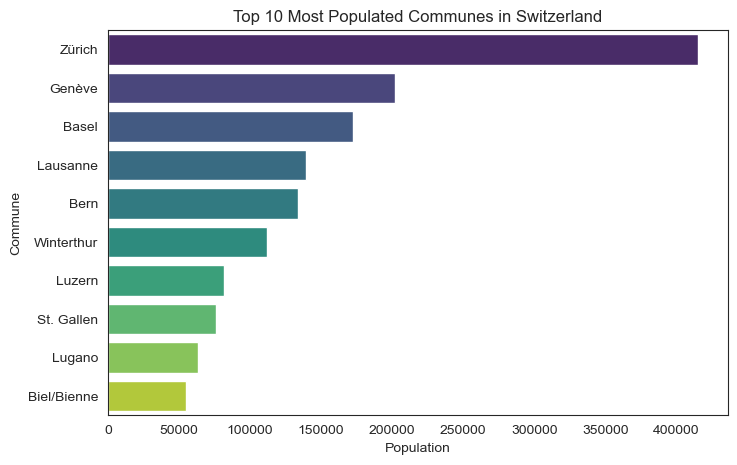

In [27]:
# Copy top 10 most populated communes
top10 = top_10_most_pop.copy()

# Create a figure
plt.figure(figsize=(8,5))

# Plot horizontal bar chart
sns.barplot(x="Residents", y="Commune", data=top10, palette="viridis")

# Set title and axes labels
plt.title("Top 10 Most Populated Communes in Switzerland")
plt.xlabel("Population")
plt.ylabel("Commune")

# Display plot
plt.show()

`top10 = top_10_most_pop.copy()` creates a copy of the previously computed DataFrame containing the top 10 communes by population. Using `.copy()` ensures that any changes to `top10` do not affect the original DataFrame.


`plt.figure(figsize=(8,5))`creates a new figure object and we control the overall size of the chart. It's only the canvas and the plotting comes next.

`sns.barplot(x="Residents", y="Commune", data=top10)`  takes the DataFrame `top10`and creates a horizontal bar plot where the y-axis shows the commune names and the x-axis shows the population as instructed.  

`palette="viridis"` applies a color gradient to the bars.


`plt.title("...")` adds a title to the chart.

`plt.xlabel("Population")` and `plt.ylabel("Commune")`labels the axes.

`plt.show()` renders the plot in the notebook.

> The chart with the color gradient highlights population concentration in major coummunes across Switzerland. It clearly shows that Zürich significantly dominates all other large urban communes like Geneva, Basel, and Lausanne in terms of population.

## C2. Horizontal Stacked Bar Chart: Division of Land Area of Top 10 Communes

Next, we visualize how land is divided in these top 10 communes among four area types: 
* `Settlement`
* `Agricultural`
* `Wooded`
* `Unproductive`

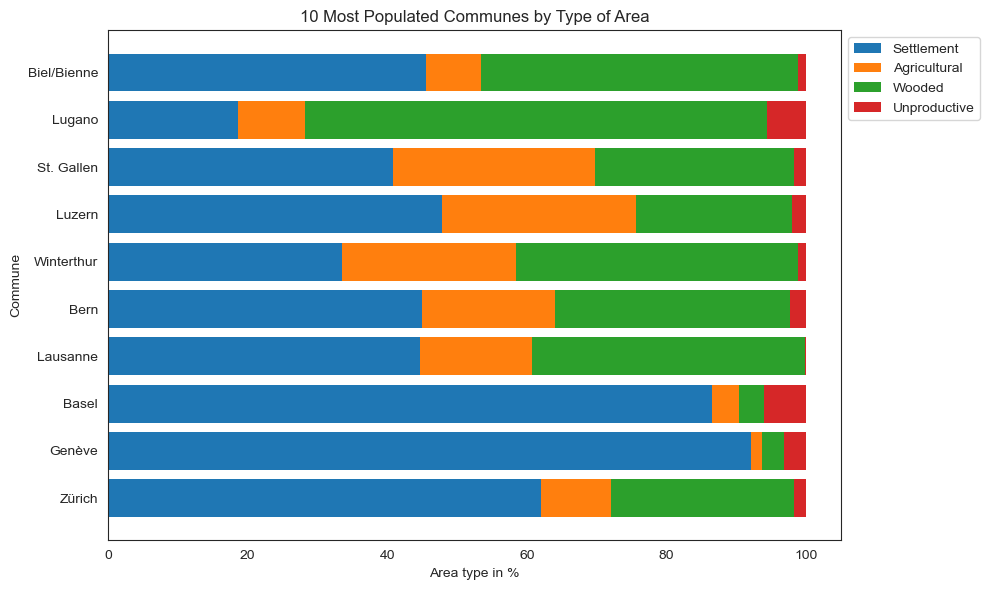

In [28]:
# Extract top 10 communes
communes = top_10_most_pop["Commune"].tolist()

# Select the land area columns
top10_area = df.loc[top_10_most_pop.index, ["Settlement area", 
                                            "Agricultural area", 
                                            "Wooded area", 
                                            "Unproductive area"]]

# Assign each land type to a variable for easier calling during stacking
settlement = top10_area["Settlement area"]
agricultural = top10_area["Agricultural area"]
wooded = top10_area["Wooded area"]
unproductive = top10_area["Unproductive area"]

plt.figure(figsize=(10,6))

# Plot stacked horizontal bars
plt.barh(communes, settlement, label="Settlement", edgecolor='none')
plt.barh(communes, agricultural, left=settlement, label="Agricultural", edgecolor='none')
plt.barh(communes, wooded, left=settlement + agricultural, label="Wooded", edgecolor='none')
plt.barh(communes, unproductive, left=settlement + agricultural + wooded, label="Unproductive", edgecolor='none')

plt.xlabel("Area type in %")
plt.ylabel("Commune")
plt.title("10 Most Populated Communes by Type of Area")

# Legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Fit the plot and legend neatly within the figure boundaries
plt.tight_layout()

plt.show()

We extracted the names of the top 10 most populated communes from the `top_10_most_pop` DataFrame and stored them in a list for the y-axis.

We produced a subset of `df`, `top10_area`, containing the area breakdowns for the top 10 communes. To do so, `df.loc[..., [...]]` selects the four relevant columns corresponding to the four land types for these communes and use the index of `top_10_most_pop` to locate the correct rows.

To create the horizontal stacked bar chart after defining the canvas with `plt.figure()`, we used `plt.barh()` to plot each land type. Stacking is achieved using the `left` parameter, which positions each segment immediately after the previous one. 

Setting `edgecolor='none'` removes the thin white lines that appear between segments by default (see [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html?utm_source=chatgpt.com) for `barh()`).

Legend placement was implemented using the `bbox_to_anchor` argument in matplotlib
([Stack Overflow, 2013](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot)).

> Each horizontal bar represents the total land area of a commune, with the segments showing the composition of land types.


### Analysis of Land Distribution in Top 10 Most Populated Communes

**Highest Settlement Area**
The top 5 most populated communes in Switzerland (Zurich, Geneva, Basel, Lausanne, and Bern) are dominated by settlement area which makes them urbanized.

* Geneva, Basel, and Zurich are **highly urbanized** communes dominated by Settlement area.
* Agricultural, Wooded, and Unproductive land areas are minimal in these specific communes.
* Total land area differences: Given the percentages sum to 100%, some communes like Basel and Geneva appear to have a larger settlement area proportion than Zurich, despite Zurich having a higher population.

even though Luzern has less people than the 6th most populated commune, Winterhur, it has a higher percentage of settlement area

**Semi-Urban Communes: Agriculture and Wooded Balance**
* Luzern, Bern, Lausanne, St. Gallen, and Winterthur retain a noticeable proportion of Agricultural area, indicating coexistence with urban zones.
* Biel/Bienne is unique in this group, as Wooded area is substantially more dominant than agricultural land.
* Lausanne has very little unproductive land.


**Lugano: A Rural-Urban Hybrid**

Lugano is heavily dominated by Wooded area with a substantial Unproductive area. This composition makes sense given its geolocation and natural obstacles (lakes/mountains), leading it to resemble a rural area's land use profile.


**Unproductive Land Overview**

Across all communes, Unproductive land is generally small but visible.
Its presence highlights natural geographic constraints, such as the Alps in Lugano and mountains near Genève.


> **Summary**: Urban areas are largely dominated by Settlement land, while semi-urban communes balance Agricultural and Wooded areas with settlement. Peripheral/rural communes retain more extensive Wooded areas, and Unproductive areas highlight natural geographic constraints. This visualization effectively demonstrates the interplay between population density, urbanization, and underlying land composition.

## C3. Distribution of Young Residents (0-19 yrs)

The histogram below visualizes the distribution of communes based on the proportion of residents aged 0–19.

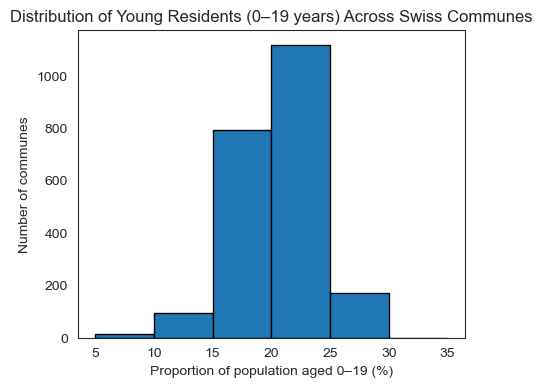

In [29]:
plt.figure(figsize=(5, 4))

plt.hist(
    df["0-19 years"],
    bins=[5, 10, 15, 20, 25, 30, 35], # intervals for proportion of young residents
    edgecolor="black" # adds borders to bars for clarity
)

plt.xlabel("Proportion of population aged 0–19 (%)")
plt.ylabel("Number of communes")
plt.title("Distribution of Young Residents (0–19 years) Across Swiss Communes")

plt.show()

Most communes have between 15% and 25% of their population aged 0–19 years. Considering that this age group spans only 20 years (compared to for example 45 years for the 20–64 working-age group), this proportion is consistent with expectations. Very few communes fall below 10% or above 30%, indicating that extreme deviations in the young population are uncommon.

>Overall, this reflects a moderate and reasonable proportion of young residents across Swiss communes.

## C4. Distribution of Young Residents (0–19 years) Across Language Regions

Switzerland has four language regions: 
- german `de`
- french `fr`
- romand `rm`
- italian `it`

To visualize the distribution of the 0–19 age group (**numerical variable**) across those regions (**categorical variable**), seaborn has **three categorical distribution plots** we can choose from: 
- **box**
- **violin**
- **boxen**

Although only one plot type was required, we first display all three side by side to illustrate how different visualization methods reveal complementary aspects of the same distribution.

The centered super title was implemented using the `fig.suptitle` method from the [Matplotlib Figure API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html).

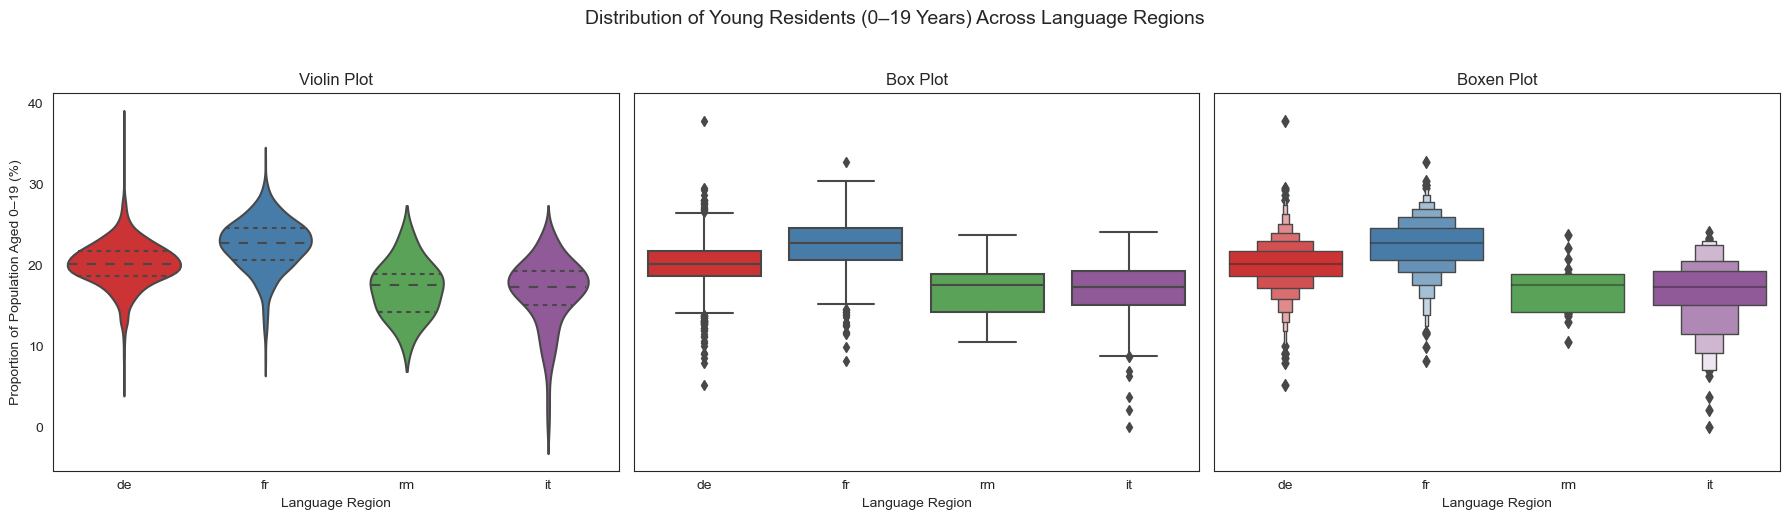

In [30]:
# Create a figure with three side-by-side subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Use a single color palette for easier comparison of plots
palette = "Set1"

# --- Violin plot (distribution shape + quartiles) ---
sns.violinplot(
    x="Language",
    y="0-19 years",
    data=df,
    palette=palette,
    inner="quartile",
    ax=axes[0]
)

axes[0].set_title("Violin Plot")
axes[0].set_xlabel("Language Region")
axes[0].set_ylabel("Proportion of Population Aged 0–19 (%)")


# --- Box plot (median, IQR, outliers) ---
sns.boxplot(
    x="Language",
    y="0-19 years",
    data=df,
    palette=palette,
    ax=axes[1]
)

axes[1].set_title("Box Plot")
axes[1].set_xlabel("Language Region")
axes[1].set_ylabel("")


# --- Boxen plot (detailed quantiles and tails) ---
sns.boxenplot(
    x="Language",
    y="0-19 years",
    data=df,
    palette=palette,
    ax=axes[2]
)

axes[2].set_title("Boxen Plot")
axes[2].set_xlabel("Language Region")
axes[2].set_ylabel("")


# Shared title for the full figure
fig.suptitle(
    "Distribution of Young Residents (0–19 Years) Across Language Regions",
    fontsize=14,
    y=1.03
)

plt.tight_layout()
plt.show()



> Use a **box plot for clear summary statistics**, a **violin plot to visualize the distribution shape**, and a **boxen plot when a group (e.g., a language region) contains many data points**, so that tail behavior and fine-grained quantiles are meaningful.

We chose the boxen plot with [`stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)to see how all the actual observations are distributed within each language region.

This time we used the figure-level interface [`catplot`](https://seaborn.pydata.org/tutorial/categorical.html)

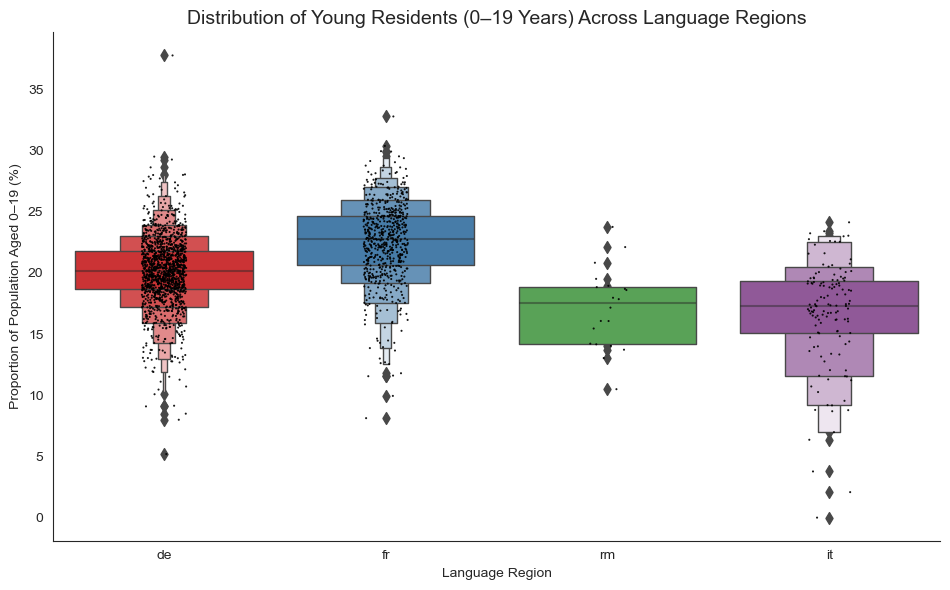

In [31]:
sns.catplot(
    data=df,
    x="Language",
    y="0-19 years",
    kind="boxen",
    palette="Set1",
    height=6,
    aspect=1.6
)

# Overlay stripplot
sns.stripplot(
    data=df,
    x="Language",
    y="0-19 years",
    color="black",
    size=1.5,       # controls the size of the data points
    alpha=0.9,      # controls their transparency
    jitter=True    # spread them horizontally to avoid overlapping
)

plt.title("Distribution of Young Residents (0–19 Years) Across Language Regions", fontsize=14)
plt.xlabel("Language Region")
plt.ylabel("Proportion of Population Aged 0–19 (%)")

plt.tight_layout()
plt.show()

### Observations

The boxenplot combined with a strip plot effectively visualizes the distribution of young residents (0-19 years) across four language regions (German, French, Romansch, and Italian), revealing data density, clusters, and any extreme observations. Overall, the youth population proportions are mostly between 15% and 25%, but the distributions differ in shape and variability across language regions:  

- **German-speaking (de) communes** have a rather symmetric distribution with slightly shorter whiskers. DE has **both lower and upper outliers**, meaning a few communes have unusually low or high youth proportions. 


- **French-speaking (fr) communes** have the **highest median proportion** and a symmetrical distribution. FR also has **both lower and upper outliers**, mostly below the lower whisker, suggesting a few communes have unusually low youth proportions.  


- **Romansh (rm) communes** show a **left-skewed distribution** with a tall box. This means that although the median proportion is relatively low, many communes have higher proportions of young residents. RM has **no outliers**, so all communes fall within a reasonable range.  

- **Italian (it) communes** are **symmetrical** with a narrower box and **only lower outliers**, indicating that most communes have low to moderate youth proportions, with a few communes slightly below the typical range.  

In summary, the **0–19 population** is generally concentrated around 15–25% across Switzerland. RM communes show **the greatest variability** and a left skew, meaning many have relatively high youth proportions. DE is **the most uniform**, IT shows low to moderate proportions, and FR has **the highest central proportion** of young residents. This analysis highlights not just differences between regions, but the **overall distribution patterns of young populations** across the country.


- The **median proportion of young residents** is similar across all language regions, generally **15–25%**, consistent with expectations given the 20-year span of this group.  
- The **violin plots** reveal that French- and Italian-speaking regions have slightly more variability in the young population, with a few communes above 25% or below 15%.  
- The **boxen plots** highlight extreme values in the tails, but these are rare, confirming that extreme age structures are uncommon.  
- Overall, the 0–19 age distribution is **moderate and relatively balanced across language regions**, with differences primarily due to **natural variation and the shorter span of this age group** compared to 20–64 and 65+.

## C5. Distribution of Age Groups 0-19, 20-64 & 65+ Years Across Language Regions¶

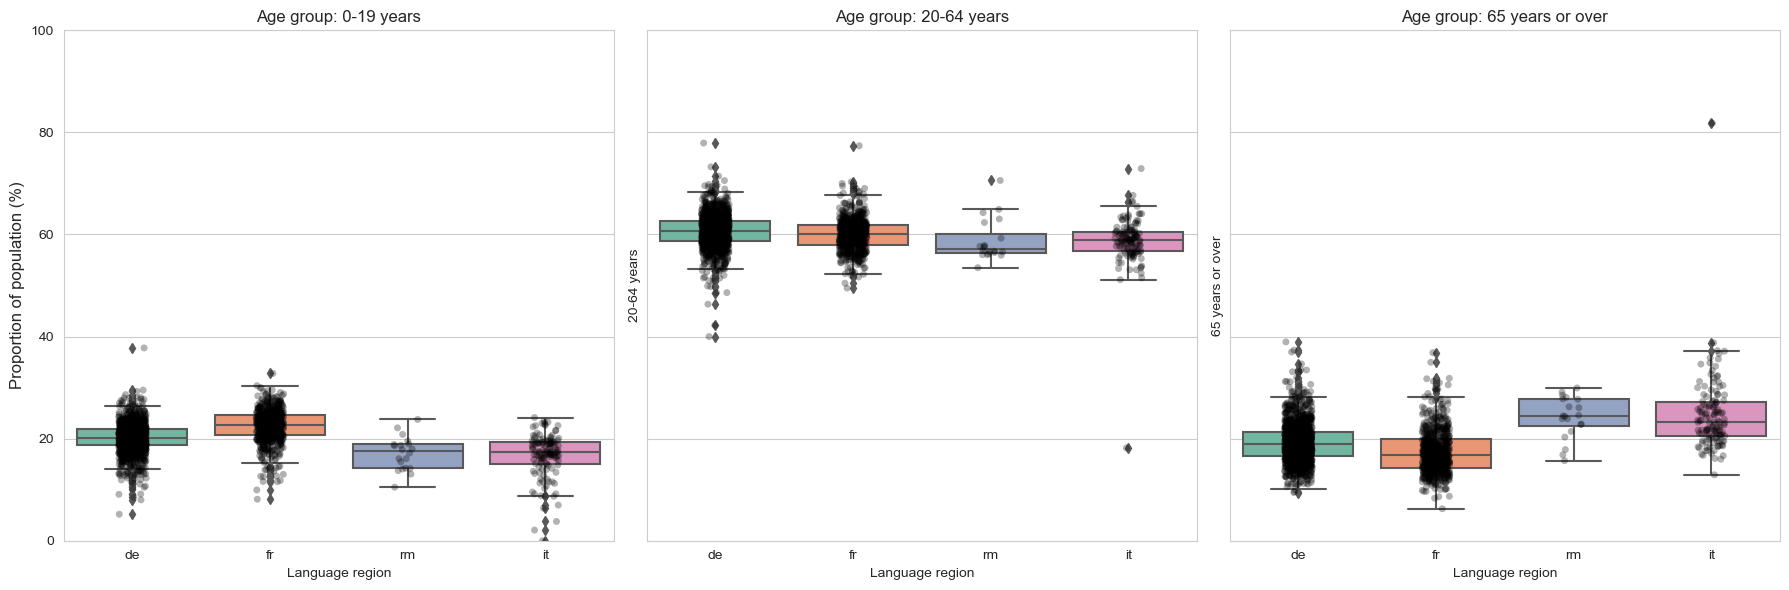

In [32]:
# Set Seaborn style for nicer plots
sns.set_style("whitegrid")

# Prepare figure and axes: 1 row x 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Age groups to plot
age_groups = ["0-19 years", "20-64 years", "65 years or over"]

# Loop over axes and age groups
for ax, age in zip(axes, age_groups):
    # Box plot
    sns.boxplot(
        data=df,
        x="Language",
        y=age,
        ax=ax,
        palette="Set2"
    )
    # Strip plot (individual communes as points)
    sns.stripplot(
        data=df,
        x="Language",
        y=age,
        ax=ax,
        color="black",
        alpha=0.3,
        jitter=True
    )
    
    # Titles and labels
    ax.set_title(f"Age group: {age}", fontsize=12)
    ax.set_xlabel("Language region", fontsize=10)
    ax.set_ylim(0, 100)  # Common y-axis across all subplots

# Set y-label only on first subplot
axes[0].set_ylabel("Proportion of population (%)", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## C6. Relation Between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area.

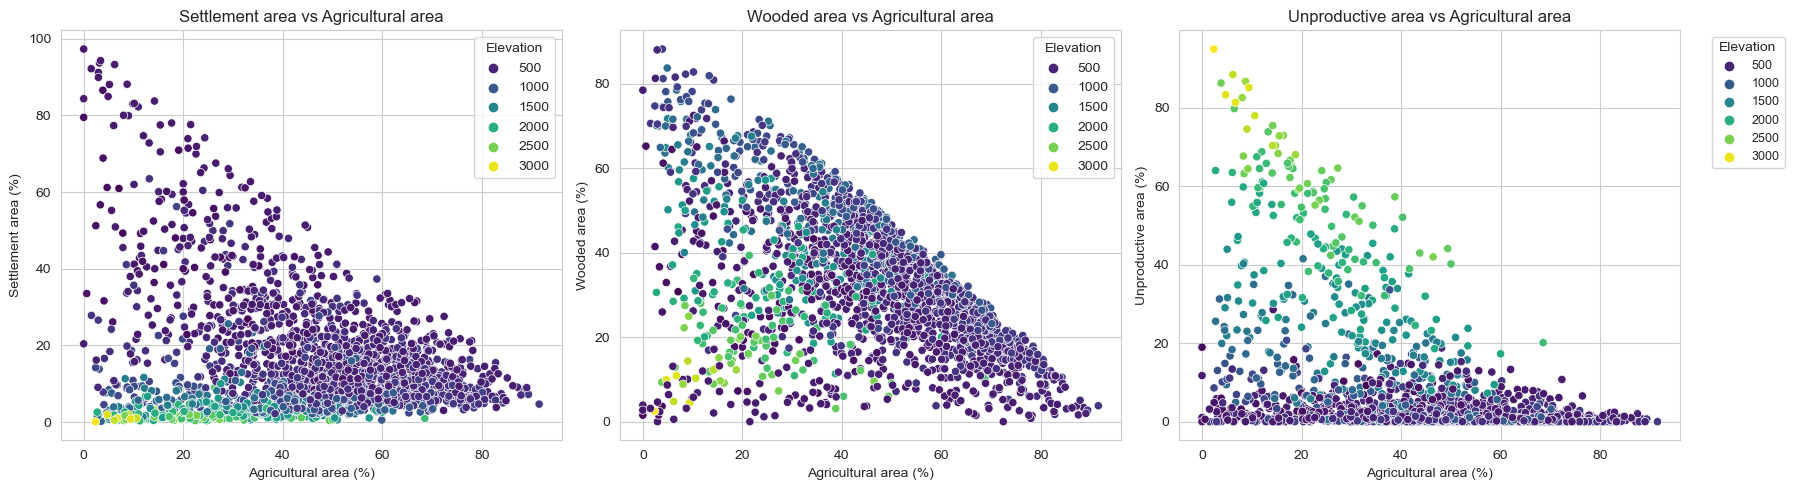

In [33]:
# Variables to compare with Agricultural area
y_vars = ["Settlement area", "Wooded area", "Unproductive area"]
x_var = "Agricultural area"

# Create pair plots individually using scatterplots with regression line (optional)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, y_var in zip(axes, y_vars):
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        hue="Elevation",      # color code by elevation
        palette="viridis",
        ax=ax
    )
    
    ax.set_xlabel("Agricultural area (%)")
    ax.set_ylabel(f"{y_var} (%)")
    ax.set_title(f"{y_var} vs {x_var}")

# Add legend outside to the right
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Elevation", fontsize=9)

plt.tight_layout()
plt.show()

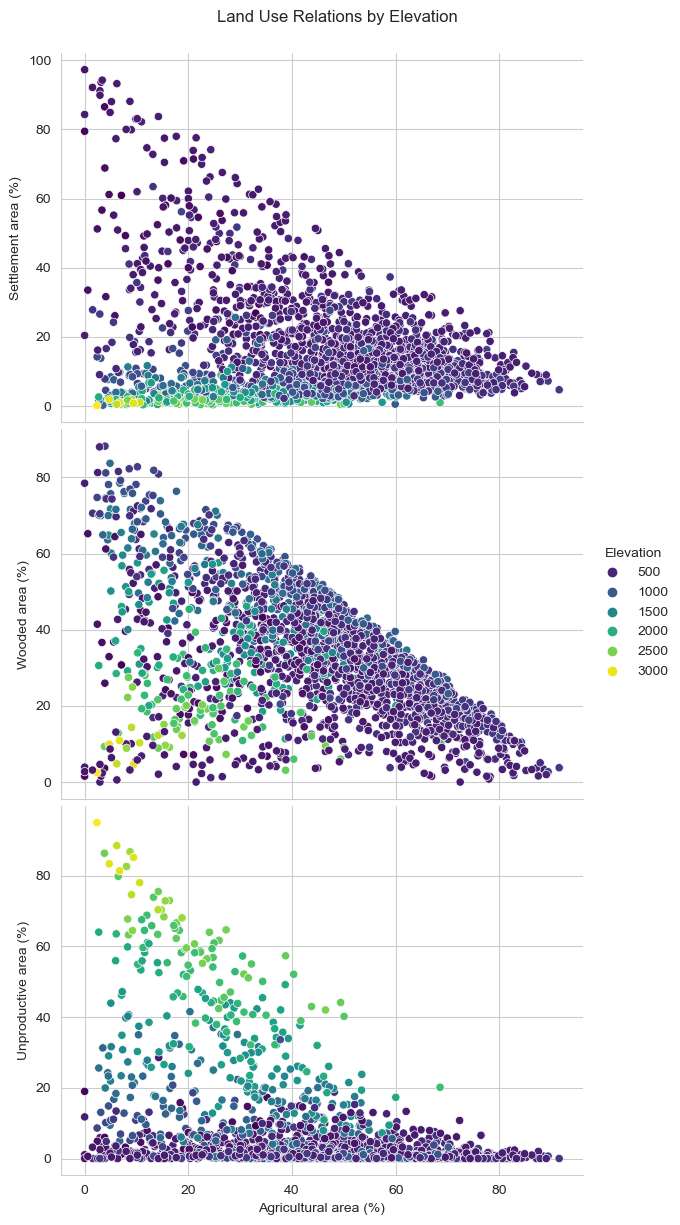

In [34]:
# vertical layout: 1 column (x_vars), 3 rows (y_vars)
g = sns.pairplot(
    data=df,
    x_vars=['Agricultural area'],
    y_vars=['Settlement area', 'Wooded area', 'Unproductive area'],
    hue='Elevation',
    palette='viridis',
    diag_kind=None,  # Fixes the 'missing settlement' rendering bug
    height=4,
    aspect=1.5
)

# Customizing titles/labels to match your task
g.fig.suptitle("Land Use Relations by Elevation", y=1.02)
g.axes[0,0].set_ylabel("Settlement area (%)")
g.axes[1,0].set_ylabel("Wooded area (%)")
g.axes[2,0].set_ylabel("Unproductive area (%)")
g.axes[2,0].set_xlabel("Agricultural area (%)")

plt.show()

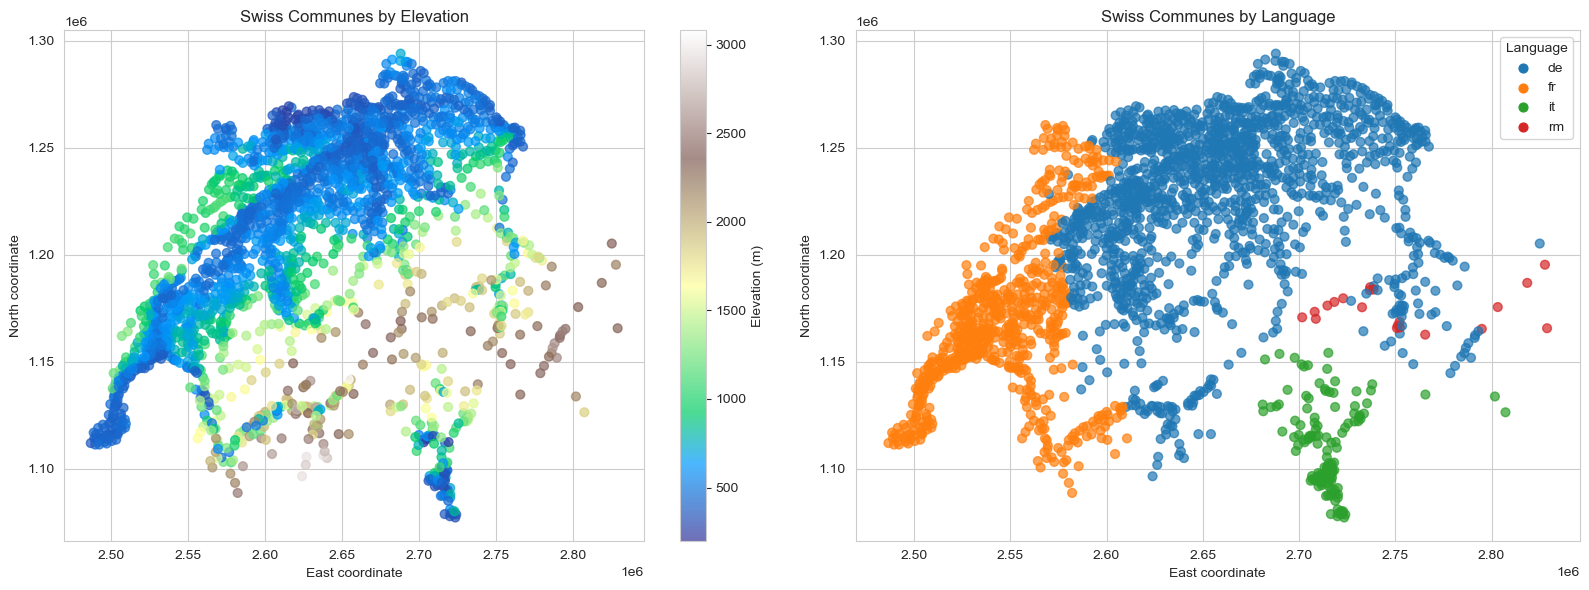

In [35]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a 1-row, 2-column figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Map 1: Color by Elevation ---
sc1 = axes[0].scatter(
    df["East coordinate"],
    df["North coordinate"],
    c=df["Elevation"],
    cmap="terrain",       # green -> brown -> white
    s=40,
    alpha=0.7
)
axes[0].set_title("Swiss Communes by Elevation")
axes[0].set_xlabel("East coordinate")
axes[0].set_ylabel("North coordinate")
cbar1 = plt.colorbar(sc1, ax=axes[0])
cbar1.set_label("Elevation (m)")

# --- Map 2: Color by Language ---
# Fix: use lowercase keys to match df["Language"]
language_palette = {"de": "#1f77b4", "fr": "#ff7f0e", "it": "#2ca02c", "rm": "#d62728"}

axes[1].scatter(
    df["East coordinate"],
    df["North coordinate"],
    c=df["Language"].map(language_palette),
    s=40,
    alpha=0.7
)
axes[1].set_title("Swiss Communes by Language")
axes[1].set_xlabel("East coordinate")
axes[1].set_ylabel("North coordinate")

# Create manual legend for languages
for lang, color in language_palette.items():
    axes[1].scatter([], [], color=color, label=lang, s=40)
axes[1].legend(title="Language", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


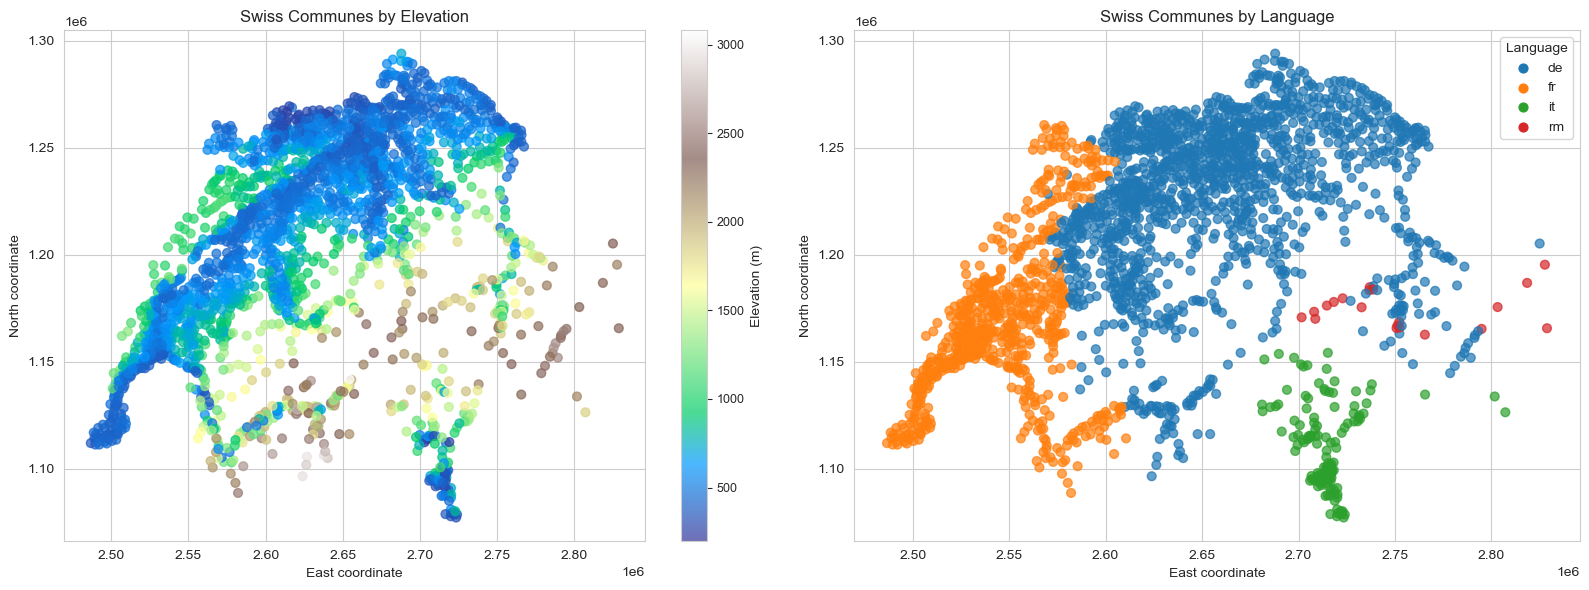

In [36]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a 1-row, 2-column figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Map 1: Color by Elevation ---
sc1 = axes[0].scatter(
    df["East coordinate"],
    df["North coordinate"],
    c=df["Elevation"],
    cmap="terrain",       # green -> brown -> white
    s=40,
    alpha=0.7
)
axes[0].set_title("Swiss Communes by Elevation")
axes[0].set_xlabel("East coordinate")
axes[0].set_ylabel("North coordinate")

# Colorbar as legend for Elevation
cbar1 = plt.colorbar(sc1, ax=axes[0])
cbar1.set_label("Elevation (m)", fontsize=10)
cbar1.ax.tick_params(labelsize=9)

# --- Map 2: Color by Language ---
# Palette keys in lowercase to match df["Language"]
language_palette = {"de": "#1f77b4", "fr": "#ff7f0e", "it": "#2ca02c", "rm": "#d62728"}

axes[1].scatter(
    df["East coordinate"],
    df["North coordinate"],
    c=df["Language"].map(language_palette),
    s=40,
    alpha=0.7
)
axes[1].set_title("Swiss Communes by Language")
axes[1].set_xlabel("East coordinate")
axes[1].set_ylabel("North coordinate")

# Manual legend for languages
for lang, color in language_palette.items():
    axes[1].scatter([], [], color=color, label=lang, s=40)
axes[1].legend(title="Language", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


**References**

McKinney, W. (2022). *Python for data analysis* (3rd ed.). O’Reilly Media.

Pandas Development Team. (2026). *Indexing and selecting data*. https://pandas.pydata.org/docs/user_guide/indexing.html